<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import glob
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np
import copy
import pandas as pd

def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

In [2]:
import seaborn as sns
sns.set()
sns.set_style('white')
sns.set_style('ticks')
plt.style.use('../my_rcparams.mplstyle')

In [3]:
panelapath = glob.glob('../../data_final/panel_fig4_int_data.pkl')
panel_a = pickle.load(open(panelapath[0],'rb'))
panelbpath = glob.glob('../../data_final/fig4_panel_b_v2.pkl')
panel_b = pickle.load(open(panelbpath[0],'rb'))
panelcpath = glob.glob('../../data_final/fig4_panel_c_v2.pkl')
panel_c = pickle.load(open(panelcpath[0],'rb'))
paneldpath = glob.glob('../../data_final/fig4_panel_d_v2.pkl')
panel_d = pickle.load(open(paneldpath[0],'rb'))

In [4]:
dpi = 1000
figtextsize=10
linewidth=3

In [5]:
import matplotlib
import matplotlib.ticker as ticker
import matplotlib.colors as colors
cmap = matplotlib.cm.get_cmap('YlGn_r')

/opt/conda/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


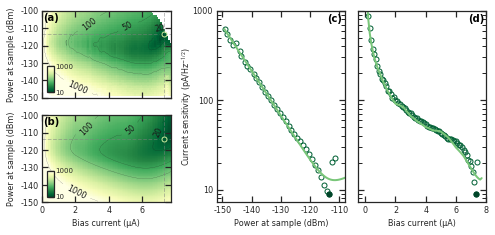

In [8]:
plt.style.use('../my_rcparams.mplstyle')

# parameters for 2D plots:
minP, maxP = -152, -108
minI, maxI = -0.5, 8
# min and max values for colorscale
# lineparameters
vmin = 10
vmax = 1000
levels = [20, 50, 1e2, 1e3]
levc = 'k'
levalp = 1
levst = 'dashed'
levlw = .2
levft = 8

fig = plt.figure(figsize=cm2inch(17.2, 8), constrained_layout=True)
gs = fig.add_gridspec(2, 3, wspace=0.06,
                      hspace=0.1)  #, width_ratios=[1,0.25,1,1])

# MEASUREMENT 2D
axa = fig.add_subplot(gs[0, 0])
# plot actual 2D data
pcm1 = plt.pcolormesh(panel_a['x'],
                      panel_a['y'],
                      panel_a['z'],
                      cmap=cmap,
                      linewidth=0,
                      rasterized=True,
                      norm=colors.LogNorm(vmin=vmin, vmax=vmax),
                      zorder=-1)
# plot contour lines
cs1 = plt.contour(panel_a['x'],
                  panel_a['y'],
                  panel_a['z'],
                  colors=levc,
                  alpha=levalp,
                  linestyles=levst,
                  levels=levels,
                  linewidths=levlw)
cs1.levels = ['%.0f' % val for val in cs1.levels]  # Recast levels to new class
manual_locations = [(7, -110), (5, -105), (3, -110), (2, -145)]
axa.clabel(cs1,
           cs1.levels,
           inline=True,
           fontsize=levft,
           manual=manual_locations)  # label contours
# plot linecut indicators, excluding the area of minimum sensitivity indicated by circle
plt.plot([panel_a['xmin'], panel_a['xmin']], [-150, -116],
         c='grey',
         ls='--',
         alpha=0.5,
         lw=1)
plt.plot([panel_a['xmin'], panel_a['xmin']], [-112, -100],
         c='grey',
         ls='--',
         alpha=0.5,
         lw=1)
plt.plot([0, 7], [panel_a['ymin'], panel_a['ymin']],
         c='grey',
         ls='--',
         alpha=0.5,
         lw=1)
plt.plot([7.6, 8], [panel_a['ymin'], panel_a['ymin']],
         c='grey',
         ls='--',
         alpha=0.5,
         lw=1)
plt.plot(panel_a['xmin'],
         panel_a['ymin'],
         'o',
         markersize=5,
         markerfacecolor='none',
         markeredgecolor=cmap(0.7))
axa.set_xticklabels([])
plt.ylabel(panel_a['ylabel'])
plt.xlim(0, 7.7)
plt.ylim(-150, -100)

# THEORY 2D
axb = fig.add_subplot(gs[1, 0])
pcm2 = plt.pcolormesh(panel_d['x'],
                      panel_d['y'],
                      panel_d['z'],
                      cmap=cmap,
                      linewidth=0,
                      rasterized=True,
                      norm=colors.LogNorm(vmin=vmin, vmax=vmax),
                      zorder=-1)
cs2 = plt.contour(panel_d['x'],
                  panel_d['y'],
                  panel_d['z'],
                  colors=levc,
                  alpha=levalp,
                  linestyles=levst,
                  levels=levels,
                  linewidths=levlw)
cs2.levels = ['%.0f' % val for val in cs2.levels]  # Recast levels to new class
axb.clabel(cs2,
           cs2.levels,
           inline=True,
           fontsize=levft,
           manual=manual_locations)  # label contours
# plot linecut indicators, excluding the area of minimum sensitivity indicated by circle
plt.plot([panel_a['xmin'], panel_a['xmin']], [-150, -116],
         c='grey',
         ls='--',
         alpha=0.5,
         lw=1)
plt.plot([panel_a['xmin'], panel_a['xmin']], [-112, -100],
         c='grey',
         ls='--',
         alpha=0.5,
         lw=1)
plt.plot([0, 7], [panel_a['ymin'], panel_a['ymin']],
         c='grey',
         ls='--',
         alpha=0.5,
         lw=1)
plt.plot([7.6, 8], [panel_a['ymin'], panel_a['ymin']],
         c='grey',
         ls='--',
         alpha=0.5,
         lw=1)
plt.plot(panel_a['xmin'],
         panel_a['ymin'],
         'o',
         markersize=5,
         markerfacecolor='none',
         markeredgecolor=cmap(0.7))
plt.xlabel(panel_d['xlabel'])
plt.ylabel(panel_d['ylabel'])
plt.xlim(0, 7.7)
plt.ylim(-150, -100)

# BEST LINECUT VS POWER
axc = fig.add_subplot(gs[:, 1])
plt.plot(panel_c['xmeas'],
         panel_c['ymeas'],
         'o',
         markerfacecolor='none',
         c=cmap(0.1))
plt.plot(panel_c['xtheo'], panel_c['ytheo'], c=cmap(0.5))
plt.plot(panel_c['xmin'],
         panel_c['ymin'],
         'o',
         markerfacecolor=cmap(0),
         markeredgecolor=cmap(0))
plt.xlabel(panel_c['xlabel'])
plt.ylabel(r'Current sensitivity (pA/Hz$^{-1/2}$)', labelpad=-1)
plt.yscale('log')
plt.gca().set_ylim(top=1e3)
plt.xticks(np.arange(-150, -100 + 1, 10))
plt.xlim(minP, maxP)
plt.gca().yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda y, pos: ('{{:.{:1d}f}}'.format(
        int(np.maximum(-np.log10(y), 0)))).format(y)))
alims = plt.gca().get_ylim()

# BEST LINECUT VS CURRENT
axd = fig.add_subplot(gs[:, 2])
plt.plot(panel_b['xmeas'],
         panel_b['ymeas'],
         'o',
         markerfacecolor='none',
         c=cmap(0.1))
plt.plot(panel_b['xtheo'], panel_b['ytheo'], c=cmap(0.5))
plt.plot(panel_b['xmin'],
         panel_b['ymin'],
         'o',
         markerfacecolor=cmap(0),
         markeredgecolor=cmap(0))
plt.xlabel(panel_b['xlabel'])
plt.xlim(minI, maxI)
plt.yscale('log')
plt.ylim(alims)
plt.gca().set_yticklabels([])

axinsA = inset_axes(axa, width="5%", height="30%", loc=3)
cbarA = plt.colorbar(pcm1, cax=axinsA)

axinsB = inset_axes(axb, width="5%", height="30%", loc=3)
cbarB = plt.colorbar(pcm2, cax=axinsB)

for cbar in [cbarA, cbarB]:
    cbar.set_ticks([vmin, vmax])
    cbar.ax.tick_params(pad=1)
    cbar.ax.set_yticklabels([vmin, vmax], fontsize=7)

axa.text(0.07,
         0.92,
         '(a)',
         color='black',
         fontsize=figtextsize,
         weight='bold',
         transform=axa.transAxes,
         verticalalignment='center',
         horizontalalignment='center')
axb.text(0.07,
         0.92,
         '(b)',
         color='black',
         fontsize=figtextsize,
         weight='bold',
         transform=axb.transAxes,
         verticalalignment='center',
         horizontalalignment='center')
axc.text(0.92,
         0.96,
         '(c)',
         color='black',
         fontsize=figtextsize,
         weight='bold',
         transform=axc.transAxes,
         verticalalignment='center',
         horizontalalignment='center')
axd.text(0.92,
         0.96,
         '(d)',
         color='black',
         fontsize=figtextsize,
         weight='bold',
         transform=axd.transAxes,
         verticalalignment='center',
         horizontalalignment='center')

plt.savefig('Figure4.pdf', bbox_inches='tight', dpi=dpi)
plt.show()
plt.close()